In [104]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

def mean_data(data):
    mean = np.mean(data, axis=0)

    return mean, data - mean

def pca(data, components):
    cov_mat = np.cov(data, rowvar=False)
    _, eigenvectors = np.linalg.eigh(cov_mat)
    top_eigenvectors = eigenvectors[-components:]

    return top_eigenvectors

def proj(data, basis):
    return np.dot(data, basis.T)

def nearest_neighbors(train, train_labels, test):
    distances = np.linalg.norm(train - test[:, np.newaxis], axis=2)
    nearest_idxs = np.argmin(distances, axis=1)
    
    return train_labels[nearest_idxs]

In [105]:
faces_data = loadmat('facesData.mat')
data = faces_data['faces']
labels = faces_data['labeles']

img_size = (32, 32)

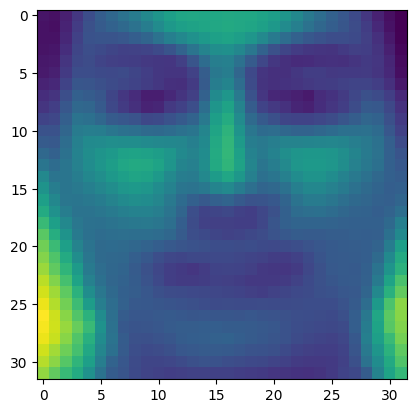

In [106]:
mean, centered_data = mean_data(data)
plt.imshow(mean.reshape(img_size).T)

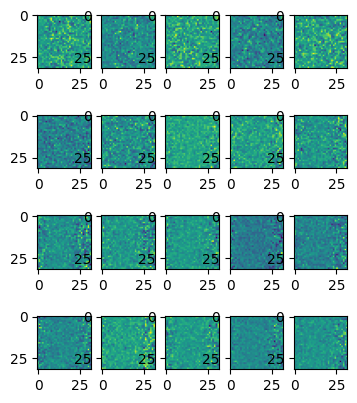

In [107]:
top_eigenvectors = pca(data, 20)
rows, cols = 4, 5
fig = plt.figure(figsize=(rows, cols))

for i in range(rows * cols):
    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(top_eigenvectors[i].reshape(img_size).T)

plt.show()

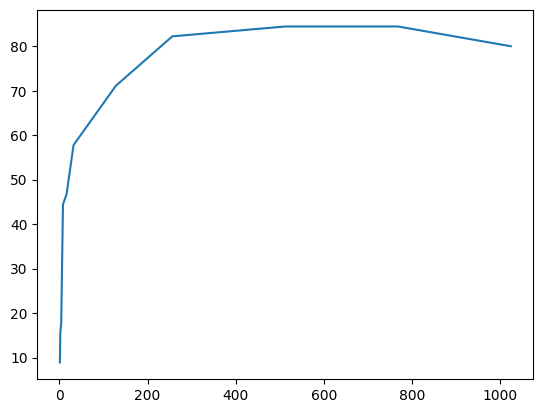

In [180]:
n = len(labels)
train_idxs = [i for i in range(len(labels)) if i % 11 < 8]
test_idxs = [i for i in range(len(labels)) if i % 11 >= 8]
K_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 1024]
accuracies = []

for K in K_values:
    top_eigenvectors = pca(centered_data, K)
    projected_data = proj(centered_data, top_eigenvectors)
    predictions = nearest_neighbors(projected_data[train_idxs], labels[train_idxs], projected_data[test_idxs])
    accuracies.append((labels[test_idxs] == predictions).sum() * 100/len(predictions))

plt.plot(K_values, accuracies)